# ML for Reservation Data & Correlation with Houston Census Figures

import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

In [99]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading in Census Data

In [100]:
Census_Data = pd.read_csv('censuses.csv', index_col=None)
Census_Data.head(5)

,line_number,house_number,street_name,last_name,given_name,relation,color_race,sex,age_at_last_birthday,occupation,own_or_rent,owned_free_or_mortgage,house_or_farm,my_notes,file_name,census_year,grouped_occu
0,65,830,Arthur St,Brown,Eliza,Boarder,B,F,26,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
1,63,830,Arthur St,Butcher,John H.,Boarder,B,M,27,Drayman,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
2,61,830,Arthur St,Olliver,Marsha,Head,B,F,25,Laundress,Rent,Null,House,Null,1900 census ED 70 page 2,1900,Unskilled
3,64,830,Arthur St,Spivey,Neata,Boarder,B,F,25,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
4,62,830,Arthur St,Wells,Ethel,Daughter,B,F,8,At School,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Student


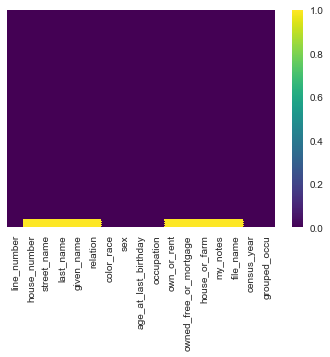

In [101]:
sns.heatmap(Census_Data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [102]:
Census_Data.isnull().any()

line_number               False
house_number               True
street_name                True
last_name                  True
given_name                 True
relation                   True
color_race                False
sex                       False
age_at_last_birthday      False
occupation                False
own_or_rent                True
owned_free_or_mortgage     True
house_or_farm              True
my_notes                   True
file_name                  True
census_year               False
grouped_occu              False
dtype: bool

In [103]:
Census_Data.columns

Index(['line_number', 'house_number', 'street_name', 'last_name', 'given_name',
       'relation', 'color_race', 'sex', 'age_at_last_birthday', 'occupation',
       'own_or_rent', 'owned_free_or_mortgage', 'house_or_farm', 'my_notes',
       'file_name', 'census_year', 'grouped_occu'],
      dtype='object')

In [104]:
Census_Data = Census_Data[['color_race', 'sex', 'age_at_last_birthday', 'occupation',
       'census_year', 'grouped_occu']]

In [105]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
dtype: bool

In [106]:
Census_Data['age_at_last_birthday'].unique()

array(['26', '27', '25', '8', '46', '34', '19', '15', '12', '9', '21',
       '5', '0', '2', '58', '35', '23', '18', '13', '56', '41', '20',
       '39', '7', '24', '51', '43', '17', '14', '60', '22', '54', '48',
       '10', '28', '30', '11', '32', '31', '29', '50', '49', '1', '63',
       '33', '6', '64', '3', '37', '55', '36', '57', '53', '16', '87',
       '81', '38', '4', '65', '45', '40', '76', '47', '44', '75', '42',
       '52', '61', '68', '69', '77', '105', '59', '62', 'Null', '84',
       '80', '5 and 0 months', '2 months', '2 and 3 month',
       '5 and 1 month', '3 and 10 months', '11 months', '70', 'un - (80)',
       '3 and 11 months', '9 months', '2 and 11 months', '5 months',
       '5 and 11 months', '67', '4 and 0 months', 'Un.', '6 and 1 month',
       '4 and 1 month', '2 and 6 months', '4 and 10 months',
       '1 and 4 months', '1 month', '2 and 5 months', '8 months', '73',
       '10 months', '2 and 10 months', '1 and 9 months', '4 months',
       '2 and 3 months

In [107]:
def age_clean(data,under_1_value = 1, pandas = 'yes'):
    clean_age = []
    if pandas == 'yes':
        data_lst = data.tolist()
    else:
        data_lst = data
    for datum in data_lst:
        if 'month' in str(datum):
            if 'and' in str(datum):
                clean_age.append(str(datum).split(' ')[0])
            else:
                clean_age.append(str(under_1_value))
        else:
            clean_age.append(datum)
    return clean_age

In [108]:
dirty_age = Census_Data['age_at_last_birthday']
#dirty_age
clean_age = age_clean(dirty_age,under_1_value = 1, pandas = 'yes')

In [109]:
Census_Data['Age'] = clean_age

In [110]:
Census_Data=Census_Data.dropna()
Census_Data['Age'].unique()

array(['26', '27', '25', '8', '46', '34', '19', '15', '12', '9', '21',
       '5', '0', '2', '58', '35', '23', '18', '13', '56', '41', '20',
       '39', '7', '24', '51', '43', '17', '14', '60', '22', '54', '48',
       '10', '28', '30', '11', '32', '31', '29', '50', '49', '1', '63',
       '33', '6', '64', '3', '37', '55', '36', '57', '53', '16', '87',
       '81', '38', '4', '65', '45', '40', '76', '47', '44', '75', '42',
       '52', '61', '68', '69', '77', '105', '59', '62', 'Null', '84',
       '80', '70', 'un - (80)', '67', 'Un.', '73', '71', '66', '90', '85',
       '72', '92', '82', '83', '100', '78', '74', '79'], dtype=object)

In [111]:
Census_Data.shape

(4244, 7)

In [112]:
print(Census_Data[Census_Data.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [color_race, sex, age_at_last_birthday, occupation, census_year, grouped_occu, Age]
Index: []


In [113]:
Census_Data['Age'] = pd.to_numeric(Census_Data['Age'], errors='coerce')

In [114]:
Census_Data['Age'].unique()

array([ 26.,  27.,  25.,   8.,  46.,  34.,  19.,  15.,  12.,   9.,  21.,
         5.,   0.,   2.,  58.,  35.,  23.,  18.,  13.,  56.,  41.,  20.,
        39.,   7.,  24.,  51.,  43.,  17.,  14.,  60.,  22.,  54.,  48.,
        10.,  28.,  30.,  11.,  32.,  31.,  29.,  50.,  49.,   1.,  63.,
        33.,   6.,  64.,   3.,  37.,  55.,  36.,  57.,  53.,  16.,  87.,
        81.,  38.,   4.,  65.,  45.,  40.,  76.,  47.,  44.,  75.,  42.,
        52.,  61.,  68.,  69.,  77., 105.,  59.,  62.,  nan,  84.,  80.,
        70.,  67.,  73.,  71.,  66.,  90.,  85.,  72.,  92.,  82.,  83.,
       100.,  78.,  74.,  79.])

In [115]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
Age                      True
dtype: bool

In [116]:
Census_Data=Census_Data.dropna()

In [117]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
Age                     False
dtype: bool

In [118]:
Census_Data.shape

(4240, 7)

In [119]:
Census_Data['color_race'].unique()

array(['B', 'W', 'Mu', 'M', 'M/W', 'My', 'Jp'], dtype=object)

In [120]:
Census_Data['color_race'].replace(['Mu', 'M', 'M/W', 'My'], "B", inplace=True)

In [121]:
Census_Data['color_race'].unique()

array(['B', 'W', 'Jp'], dtype=object)

In [122]:
Census_Data = Census_Data[Census_Data.color_race != 'Jp']
Census_Data['color_race'].unique()

array(['B', 'W'], dtype=object)

In [123]:
Census_Data['sex'].unique()

array(['F', 'M', 'FM'], dtype=object)

In [124]:
Census_Data = Census_Data[Census_Data.sex != 'FM']
Census_Data['sex'].unique()

array(['F', 'M'], dtype=object)

In [125]:
Census_Data['census_year'].unique()

array([1900, 1920, 1910], dtype=int64)

In [126]:
Census_Data['grouped_occu'].unique()

array(['Unskilled', 'Student', 'Missing Occupations', 'Skilled Labor',
       'Skilled Professionals'], dtype=object)

In [127]:
Census_Data.shape

(4236, 7)

In [128]:
Census_Data.rename(columns={'color_race': 'Race', 'sex': 'Sex', 'census_year':'Year',
                           'grouped_occu':'Occ'}, inplace=True)

In [129]:
Census_Data.head(10)

,Race,Sex,age_at_last_birthday,occupation,Year,Occ,Age
0,B,F,26,Servant,1900,Unskilled,26.0
1,B,M,27,Drayman,1900,Unskilled,27.0
2,B,F,25,Laundress,1900,Unskilled,25.0
3,B,F,25,Servant,1900,Unskilled,25.0
4,B,F,8,At School,1900,Student,8.0
5,B,M,46,Day Laborer,1900,Unskilled,46.0
6,B,F,34,Null,1900,Missing Occupations,34.0
7,B,M,19,Drayman,1900,Unskilled,19.0
8,B,F,15,Null,1900,Missing Occupations,15.0
9,B,M,12,At School,1900,Student,12.0


In [130]:
del Census_Data['age_at_last_birthday']
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,26.0
1,B,M,Drayman,1900,Unskilled,27.0
2,B,F,Laundress,1900,Unskilled,25.0
3,B,F,Servant,1900,Unskilled,25.0
4,B,F,At School,1900,Student,8.0


In [131]:
Census_Data = Census_Data[Census_Data.Occ != 'Missing Occupations']

In [132]:
Census_Data.shape

(2837, 6)

In [133]:
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,26.0
1,B,M,Drayman,1900,Unskilled,27.0
2,B,F,Laundress,1900,Unskilled,25.0
3,B,F,Servant,1900,Unskilled,25.0
4,B,F,At School,1900,Student,8.0


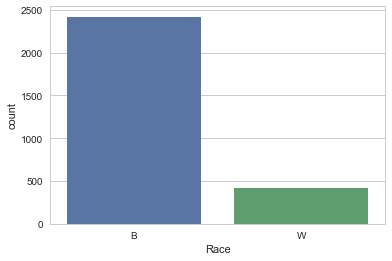

In [134]:
sns.countplot(x = 'Race',data=Census_Data)
plt.show()

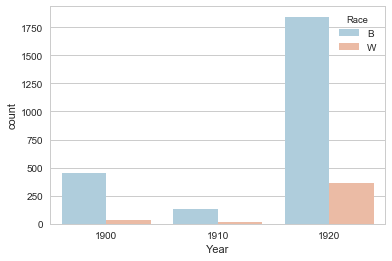

In [135]:
sns.countplot(x='Year',hue='Race',data=Census_Data,palette='RdBu_r')

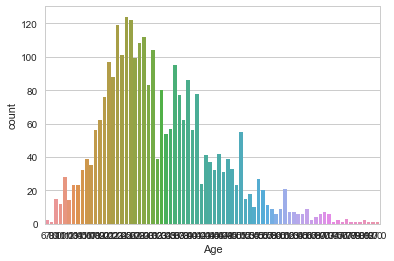

In [136]:
sns.countplot(x = 'Age',data=Census_Data)
plt.show()



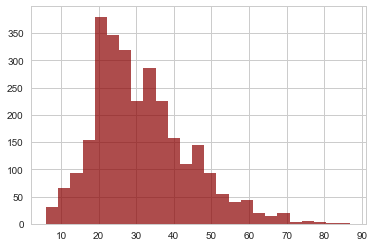

In [137]:
Census_Data['Age'].hist(bins=25,color='darkred',alpha=0.7)

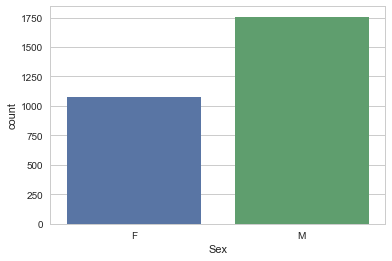

In [138]:
sns.countplot(x = 'Sex',data=Census_Data)
plt.show()

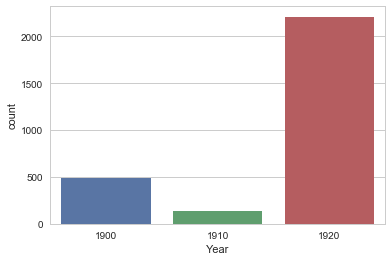

In [139]:
sns.countplot(x = 'Year',data=Census_Data)
plt.show()

In [140]:
age_ranges= [0,11,19,40,65,110]
age_labels = ['age_0-11','age_12-19','age_20-40','age_40-65','age_Above-65']
Census_Data['Age'] = pd.cut(Census_Data['Age'], bins=age_ranges, labels=age_labels)

In [141]:
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,age_20-40
1,B,M,Drayman,1900,Unskilled,age_20-40
2,B,F,Laundress,1900,Unskilled,age_20-40
3,B,F,Servant,1900,Unskilled,age_20-40
4,B,F,At School,1900,Student,age_0-11


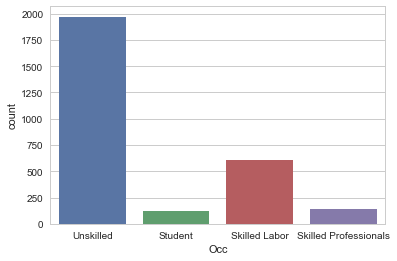

In [142]:
sns.countplot(x = 'Occ',data=Census_Data)
plt.show()

In [143]:
data2 = pd.get_dummies(Census_Data, columns =['Race','Sex', 'Year','Age'])
data2.columns

Index(['occupation', 'Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900',
       'Year_1910', 'Year_1920', 'Age_age_0-11', 'Age_age_12-19',
       'Age_age_20-40', 'Age_age_40-65', 'Age_age_Above-65'],
      dtype='object')

In [144]:
data2.head()

,occupation,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_age_0-11,Age_age_12-19,Age_age_20-40,Age_age_40-65,Age_age_Above-65
0,Servant,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
1,Drayman,Unskilled,1,0,0,1,1,0,0,0,0,1,0,0
2,Laundress,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
3,Servant,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
4,At School,Student,1,0,1,0,1,0,0,1,0,0,0,0


In [145]:
del data2['occupation']
data2 = data2.apply(pd.to_numeric, errors='ignore')
data2.dtypes

Occ                 object
Race_B               uint8
Race_W               uint8
Sex_F                uint8
Sex_M                uint8
Year_1900            uint8
Year_1910            uint8
Year_1920            uint8
Age_age_0-11         uint8
Age_age_12-19        uint8
Age_age_20-40        uint8
Age_age_40-65        uint8
Age_age_Above-65     uint8
dtype: object

In [146]:
data2.shape

(2837, 13)

In [147]:
data2.head()

,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_age_0-11,Age_age_12-19,Age_age_20-40,Age_age_40-65,Age_age_Above-65
0,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
1,Unskilled,1,0,0,1,1,0,0,0,0,1,0,0
2,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
3,Unskilled,1,0,1,0,1,0,0,0,0,1,0,0
4,Student,1,0,1,0,1,0,0,1,0,0,0,0


In [148]:
train,test = train_test_split(data2,test_size=0.2,random_state=7)

In [149]:
print ("train shape:   ")
print(train.shape)
print ("test shape:    ")
print(test.shape)
print ("Unique classes with count : ")
print(pd.value_counts(train['Occ']))
print ("data description : ")
print(train.describe())

train shape:   
(2269, 13)
test shape:    
(568, 13)
Unique classes with count : 
Unskilled                1577
Skilled Labor             488
Skilled Professionals     106
Student                    98
Name: Occ, dtype: int64
data description : 
            Race_B       Race_W        Sex_F        Sex_M    Year_1900  \
count  2269.000000  2269.000000  2269.000000  2269.000000  2269.000000   
mean      0.862054     0.137946     0.382107     0.617893     0.174526   
std       0.344920     0.344920     0.486010     0.486010     0.379645   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     0.000000   
75%       1.000000     0.000000     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Year_1910    Year_1920  Age_age_0-11  Age_age_12-19  Age_age_20-40  \
count  2

In [150]:
#checking missing values
print (train.info())
#No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 3184 to 279
Data columns (total 13 columns):
Occ                 2269 non-null object
Race_B              2269 non-null uint8
Race_W              2269 non-null uint8
Sex_F               2269 non-null uint8
Sex_M               2269 non-null uint8
Year_1900           2269 non-null uint8
Year_1910           2269 non-null uint8
Year_1920           2269 non-null uint8
Age_age_0-11        2269 non-null uint8
Age_age_12-19       2269 non-null uint8
Age_age_20-40       2269 non-null uint8
Age_age_40-65       2269 non-null uint8
Age_age_Above-65    2269 non-null uint8
dtypes: object(1), uint8(12)
memory usage: 62.0+ KB
None


In [151]:
#Modelling
train['Occ'][train['Occ']=='Unskilled']=0
train['Occ'][train['Occ']=='Skilled Labor']=1
train['Occ'][train['Occ']=='Skilled Professionals']=2
train['Occ'][train['Occ']=='Student']=3
test['Occ'][test['Occ']=='Unskilled']=0
test['Occ'][test['Occ']=='Skilled Labor']=1
test['Occ'][test['Occ']=='Skilled Professionals']=2
test['Occ'][test['Occ']=='Student']=3

X = train.iloc[:,1:]
y = train.iloc[:,0]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,0])





In [152]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [153]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

In [154]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogisticRegression: 0.721467 (0.023496)
DecisionTreeClassifier: 0.715288 (0.027295)
LinearDiscriminantAnalysis: 0.705164 (0.029248)
KNeighborsClassifier: 0.691065 (0.060970)
GaussianNB: 0.170987 (0.044832)
SVC: 0.724110 (0.024982)


In [155]:
# Make predictions on validation dataset
print ("SVC Performance")
SVM = SVC()
SVM.fit(X,y)
predictions = SVM.predict(test.iloc[:,1:])
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


SVC Performance
0.7235915492957746
[[388   0   0   6]
 [114   0   0   4]
 [ 33   0   0   0]
 [  0   0   0  23]]
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       394
           1       0.00      0.00      0.00       118
           2       0.00      0.00      0.00        33
           3       0.70      1.00      0.82        23

   micro avg       0.72      0.72      0.72       568
   macro avg       0.36      0.50      0.41       568
weighted avg       0.53      0.72      0.61       568



In [156]:
print ("KNN Performance")
KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,1:])
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

KNN Performance
0.6954225352112676
[[367  23   0   4]
 [105  12   0   1]
 [ 32   1   0   0]
 [  7   0   0  16]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       394
           1       0.33      0.10      0.16       118
           2       0.00      0.00      0.00        33
           3       0.76      0.70      0.73        23

   micro avg       0.70      0.70      0.70       568
   macro avg       0.45      0.43      0.42       568
weighted avg       0.60      0.70      0.62       568



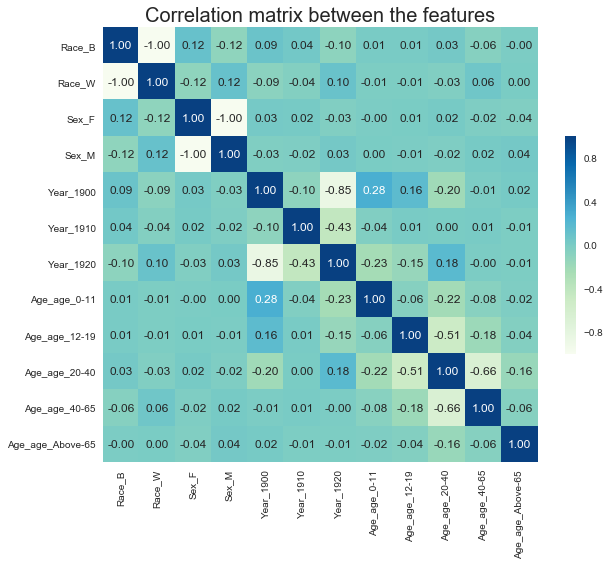

In [52]:
correlation_matrix = data2.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()